In [1]:
import plotly.graph_objects as go 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
tb1b = pd.read_csv('table_1b.csv') 
tb3 = pd.read_csv('table_3.csv') 
tb1b['male'] = round(tb1b['kid_count'] * tb1b['inventor_g_m'])
tb1b['female'] = round(tb1b['kid_count'] * tb1b['inventor_g_f'])

## Q1
gender vs. innovativeness

In [3]:
tb1b['total'] = tb1b['male'] + tb1b['female']
tb1b = tb1b.set_index('total')
tb1b = tb1b.sort_index(axis=0)

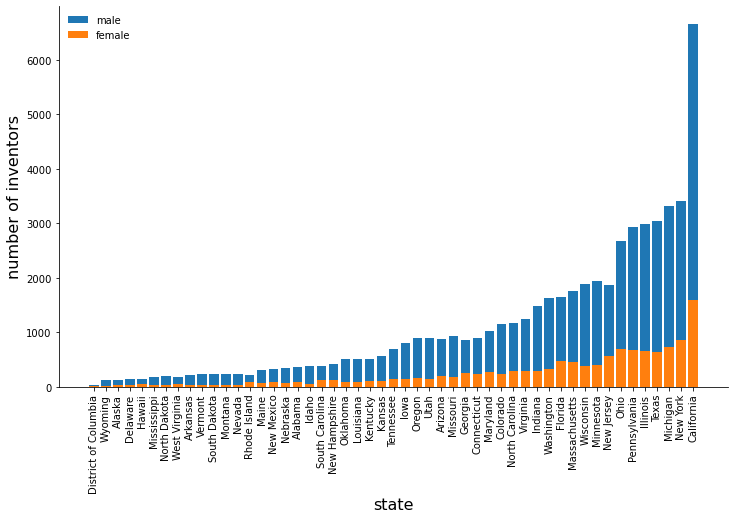

In [4]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(tb1b['par_state'],tb1b['male'], label = 'male')
ax.bar(tb1b['par_state'],tb1b['female'], label = 'female')
ax.set_xlabel('state', fontsize = 16)
ax.set_ylabel('number of inventors', fontsize = 16)
plt.xticks(rotation=90)
ax.legend(frameon=False)
sns.despine()
plt.savefig('q1_1.svg', bbox_inches='tight')

## Q2
location vs. innovativeness

## raw population

In [5]:
tb1b = tb1b.reset_index()
tb1b['inventor_num'] = round(tb1b['inventor'] * tb1b['kid_count'])

In [6]:
layout = go.Layout(
  margin=go.layout.Margin(l=0, r=0, b=0,t=0)
)
fig = go.Figure(data=go.Choropleth( 
    locations=tb1b['par_stateabbrv'],
    z = tb1b['inventor_num'], 
    locationmode = 'USA-states', 
    colorscale = 'Blues', 
    colorbar_title = "Inventors Number" 
),layout = layout) 
fig.update_layout(geo_scope='usa') 

In [7]:
fig.write_image("q2_1.svg")

## population adjusted 

In [8]:
tb1b['inventor_10000'] = round(tb1b['inventor'] * 10000)

In [9]:
layout = go.Layout(
  margin=go.layout.Margin(l=0, r=0, b=0,t=0)
)
fig = go.Figure(data=go.Choropleth( 
    locations=tb1b['par_stateabbrv'],
    z = tb1b['inventor_10000'], 
    locationmode = 'USA-states', 
    colorscale = 'Blues', 
    colorbar_title = "Inventors Number" 
),layout = layout) 
 
fig.update_layout(geo_scope='usa') 

In [10]:
fig.write_image("q2_2.svg")

## Q3
parent income vs. innovativeness

In [11]:
states = list(tb1b['par_state'])
st = random.sample(states, 5)
income = tb1b[tb1b["par_state"].isin(st)].reset_index(drop=True)
temp = income[income.columns[income.columns.str.contains("r_pq_")]]
temp['par_state'] = income['par_state']

<ipython-input-11-c9fdfa49fcc2>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



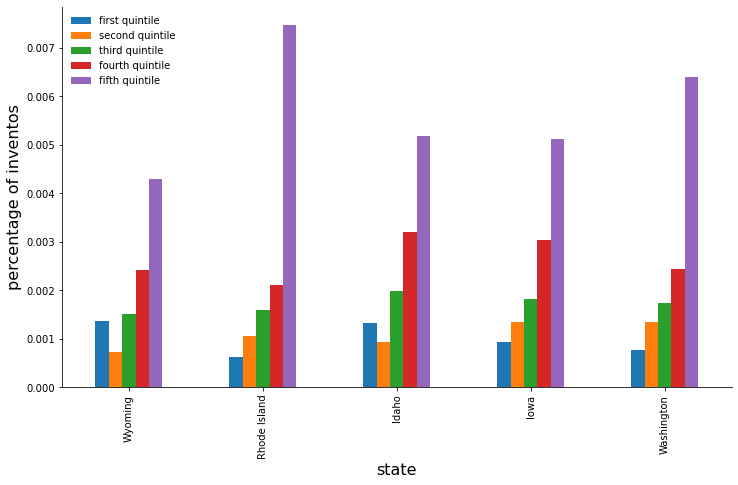

In [12]:
ax=income.plot(x='par_state',
               y=['inventor_pq_1','inventor_pq_2','inventor_pq_3','inventor_pq_4','inventor_pq_5'], 
               kind='bar',
              figsize=(12, 7))
ax.set_xlabel('state',fontsize = 16)
ax.set_ylabel('percentage of inventos',fontsize = 16)
ax.legend(['first quintile','second quintile','third quintile','fourth quintile','fifth quintile'], frameon=False)
sns.despine()
plt.savefig('q3_1.svg', bbox_inches='tight')

In [13]:
temp = tb1b[tb1b.columns[tb1b.columns.str.contains("r_pq_")]]
temp['par_state'] = tb1b['par_state']

<ipython-input-13-3c8f023aee2f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



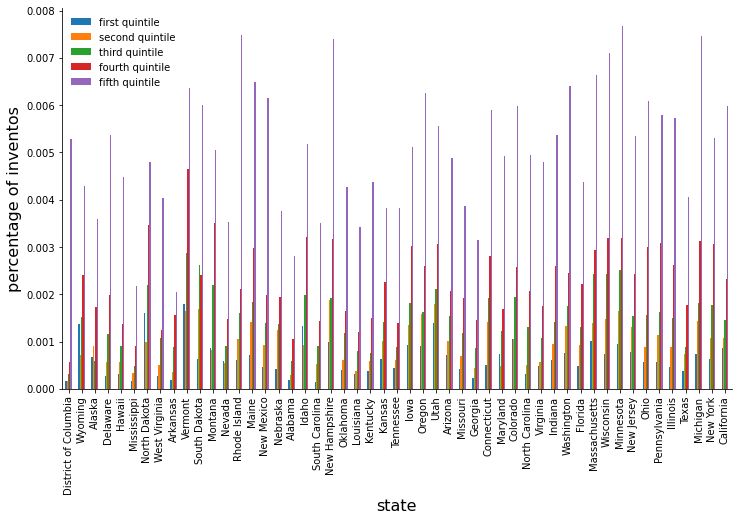

In [14]:
ax=temp.plot(x = 'par_state',
               y = ['inventor_pq_1','inventor_pq_2','inventor_pq_3','inventor_pq_4','inventor_pq_5'], 
               kind = 'bar',
              figsize=(12, 7))
ax.set_xlabel('state',fontsize = 16)
ax.set_ylabel('percentage of inventos',fontsize = 16)
ax.legend(['first quintile','second quintile','third quintile','fourth quintile','fifth quintile'], frameon=False)
sns.despine()
plt.savefig('q3_2.svg', bbox_inches='tight')

## Q4
college vs. general public

In [15]:
tb3.inventor.mean()

0.008809734515366445

In [16]:
tb3.inventor.std()

0.015702054824859125

In [17]:
tb1b.inventor.mean()

0.0021343078431372547

In [18]:
tb1b.inventor.std()

0.000815231739775418